#DATA CLEANING --Customers

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [2]:
df = pd.read_csv('/content/Customers.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,07-03-1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.columns = ['CustomerKey', 'Gender', 'Name','City','State_Code','State','Zip_Code','Country','Continent','Birthday']


In [ ]:
df.head()

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,07-03-1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [5]:
df["State_Code"].isnull().sum()


10

In [6]:
df

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,07-03-1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11-09-1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10-12-1937


In [7]:
df["Zip_Code"].unique()


array(['5523', '6522', '3380', ..., '38833', '22079', '28405'],
      dtype=object)

In [ ]:
df["Zip_Code"] = df["Zip_Code"].astype('int64')

ValueError: invalid literal for int() with base 10: 'V3L 5H1'

In [8]:
# Use pd.to_numeric to find non-numeric zip codes
non_numeric_zip_codes = df[~df["Zip_Code"].str.isnumeric()]

# Display non-numeric zip codes
print(non_numeric_zip_codes["Zip_Code"])


1420     V3L 5H1
1421     H4A 1H3
1422     H3C 5K4
1423     H3C 5K4
1424     V0N 2P0
          ...   
8433    AB53 4BU
8434     LN4 0UY
8435    EH24 4WJ
8436    PO30 9WS
8437     WA3 2ET
Name: Zip_Code, Length: 4230, dtype: object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State_Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip_Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
#to convert datetim format but we have mixed date format so this option wont work
#df['Birthday'] = pd.to_datetime(df['Birthday'], format = '%Y-%m-%d')


ValueError: time data "07-03-1939" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [10]:
df['Birthday'] = pd.to_datetime(df['Birthday'], format='mixed',dayfirst=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State_Code   15256 non-null  object        
 5   State        15266 non-null  object        
 6   Zip_Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.2+ MB


In [12]:
df["Birthday"].isnull().sum()

0

In [13]:
# Doing some sanity checks on date data
today = dt.date.today()
today


datetime.date(2024, 9, 17)

In [14]:
# Are there reviews in the future?
df[df['Birthday'].dt.date > today]

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday


In [15]:
df.head()

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-03-07
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19


In [16]:
# Print unique values
df['Country'].unique()

array(['Australia', 'Canada', 'Germany', 'France', 'Italy', 'Netherlands',
       'United Kingdom', 'United States'], dtype=object)

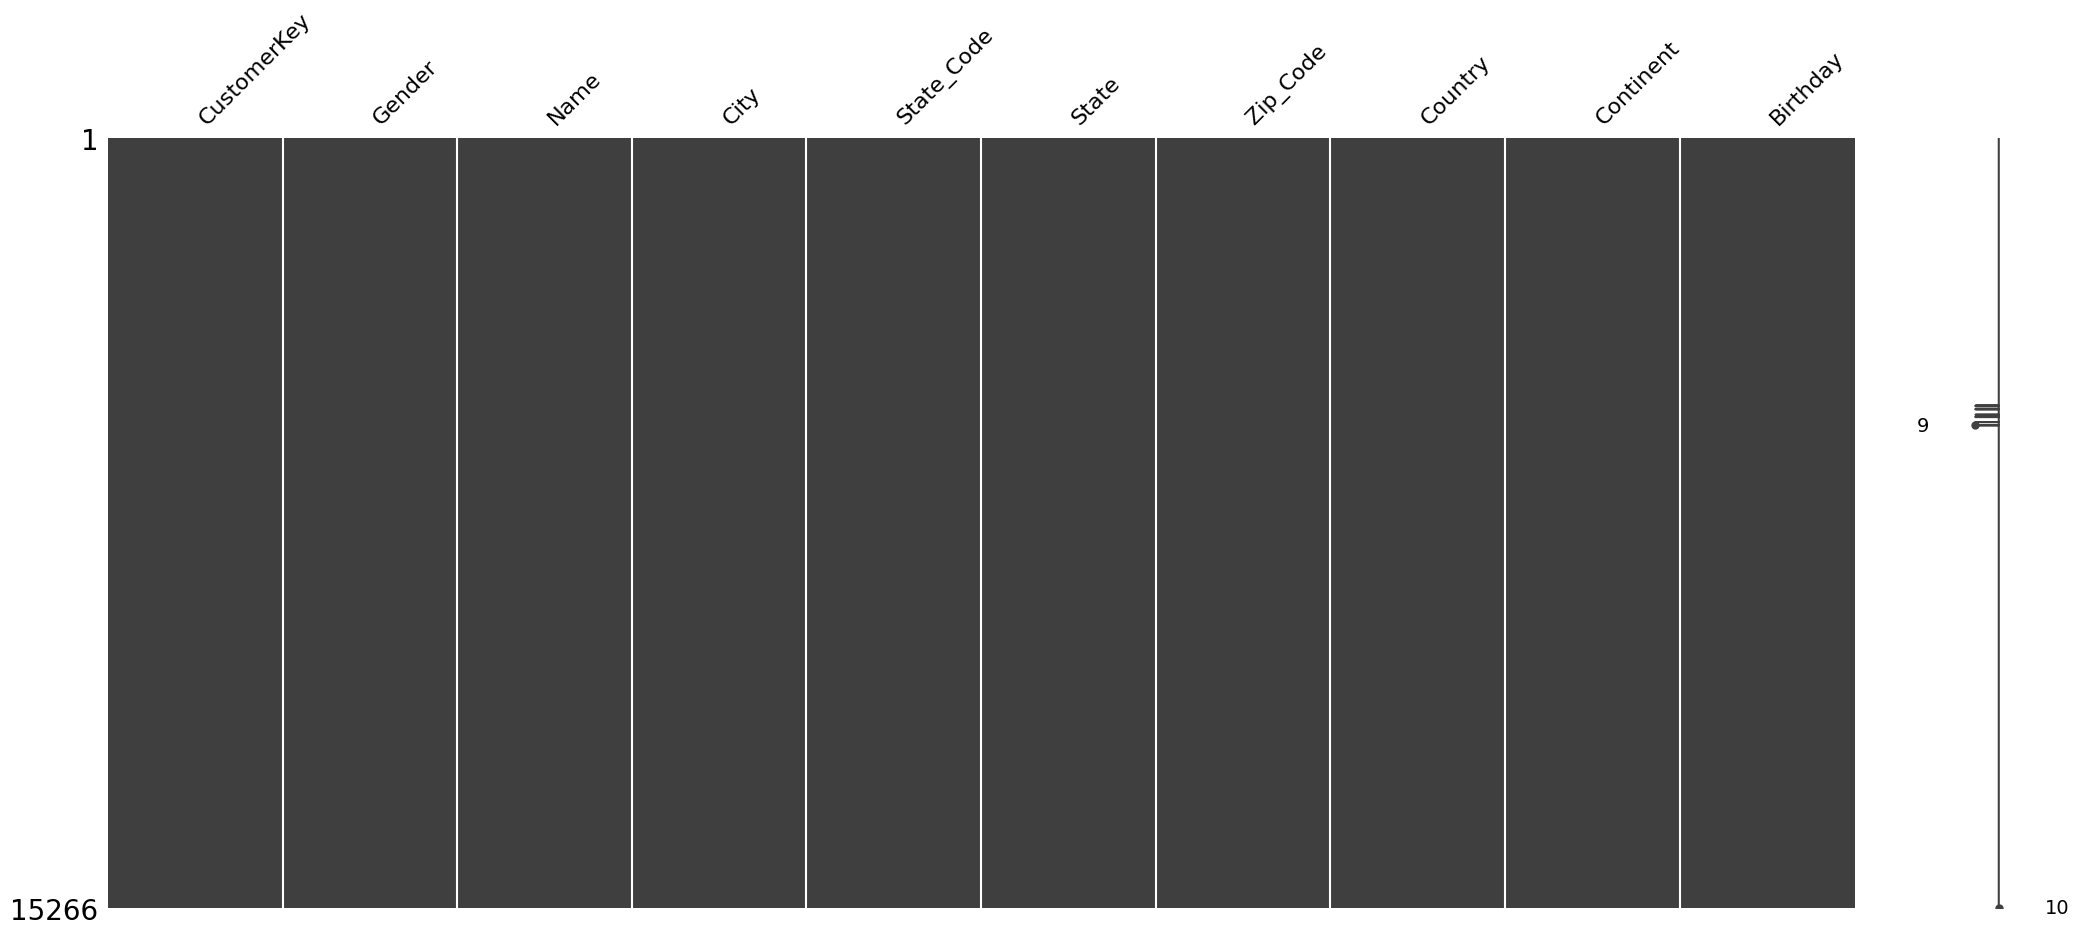

In [ ]:
msno.matrix(df)
plt.show()

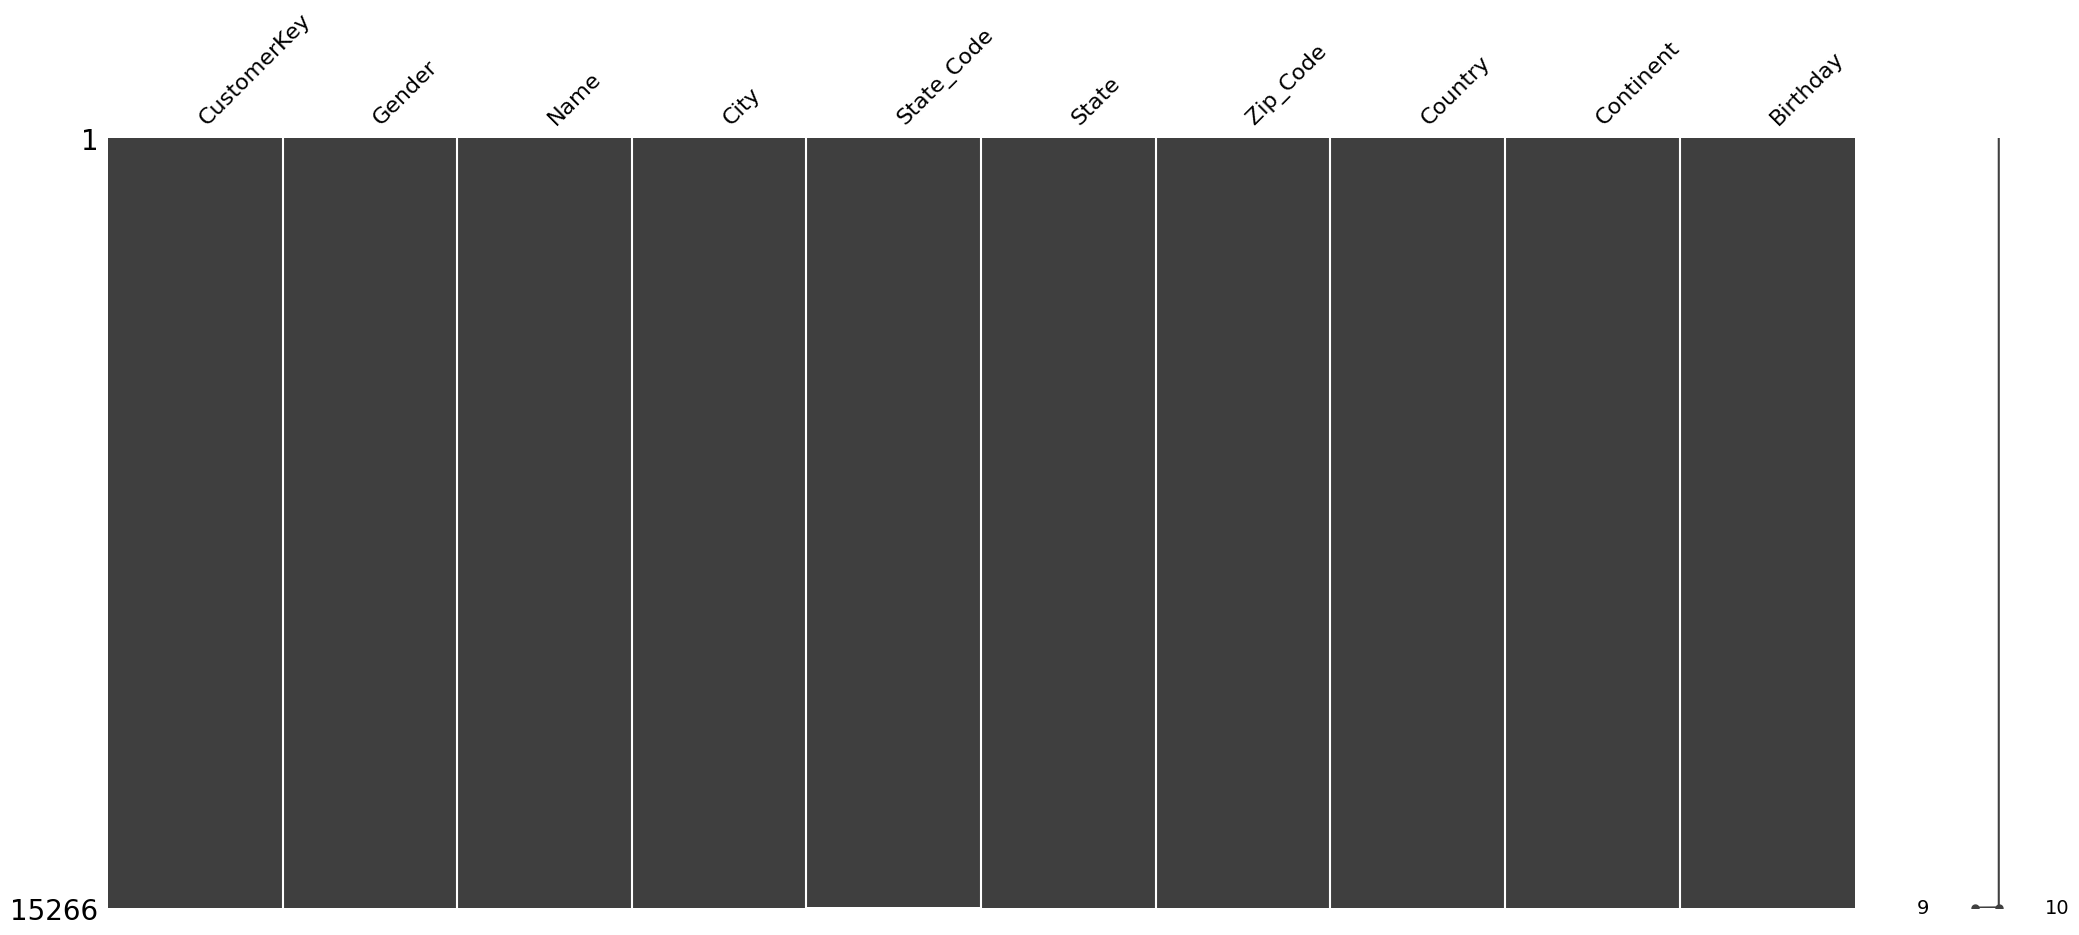

In [ ]:
msno.matrix(df.sort_values(by = 'State_Code'))
plt.show()

<Axes: >

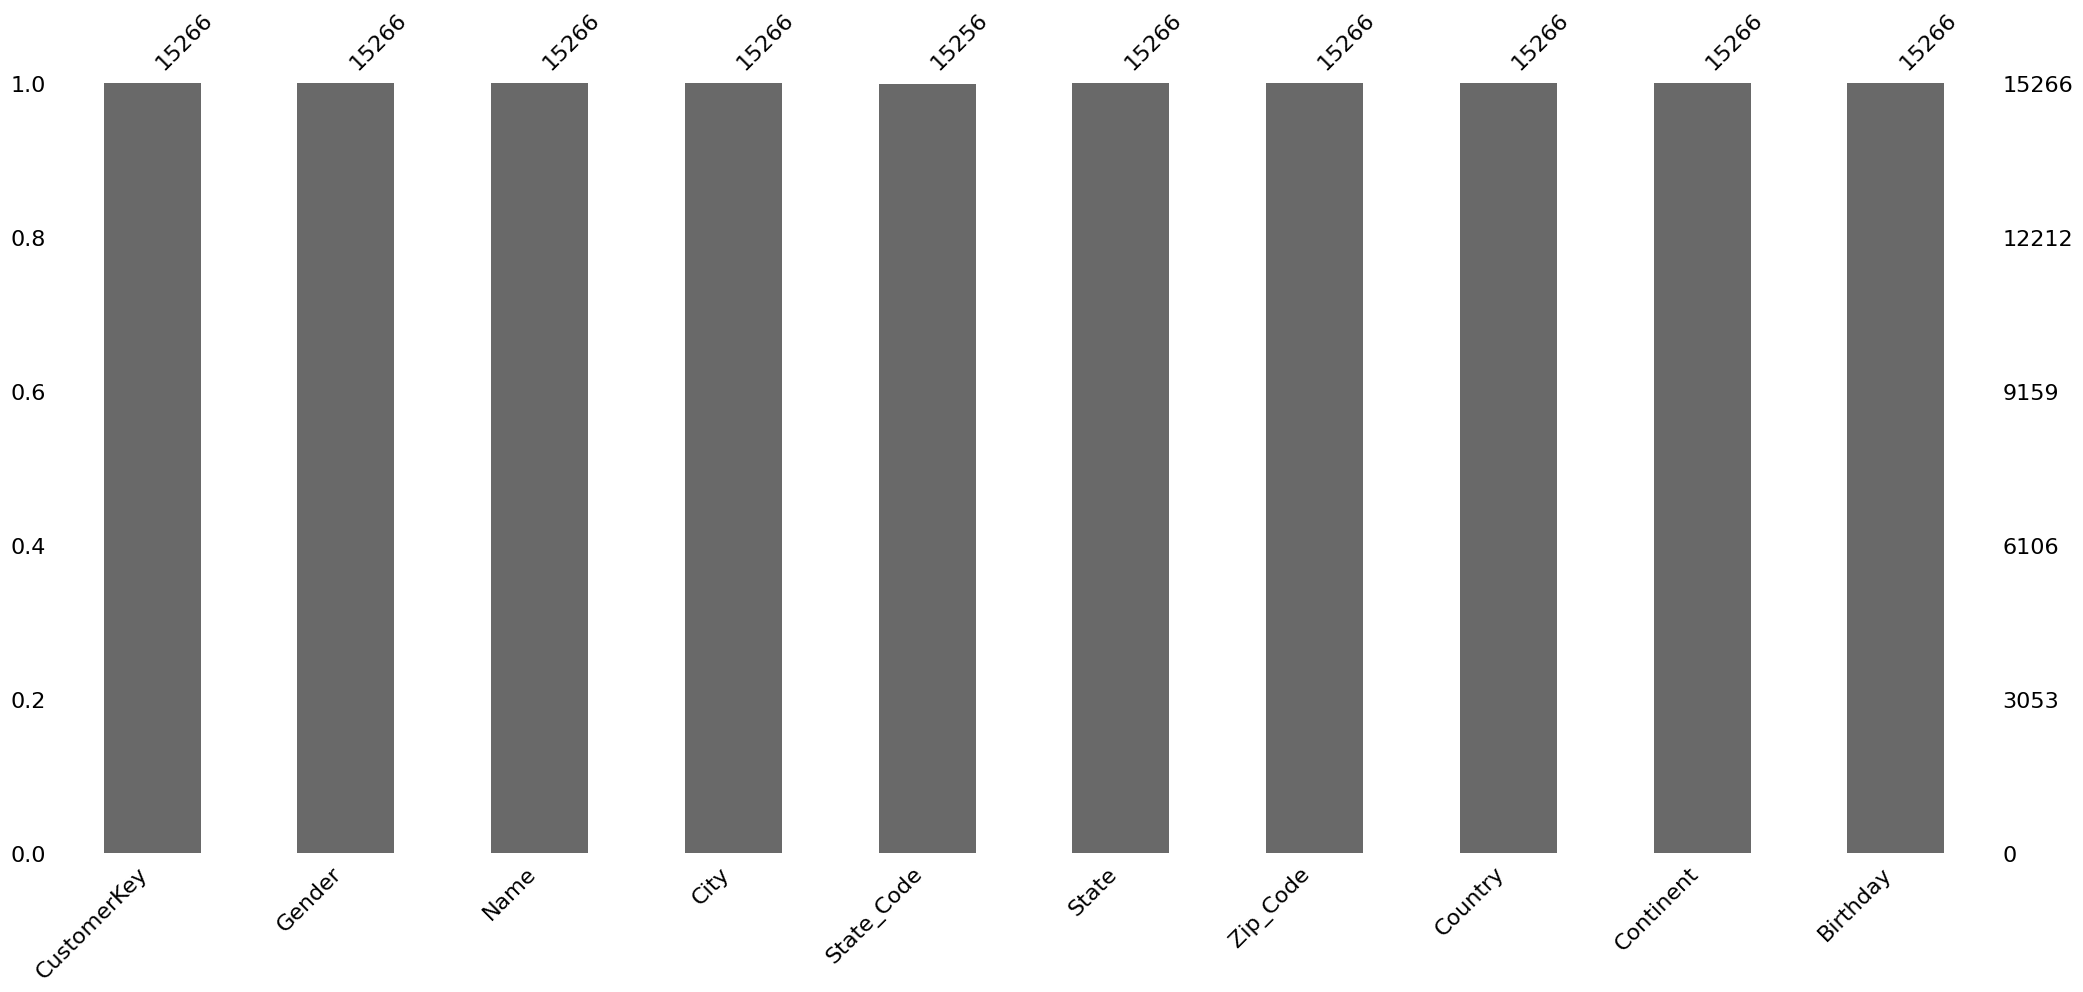

In [ ]:
msno.bar(df)

In [ ]:
missing_count = df['State_Code'].isnull().sum()
print(f"Missing values in 'statecode': {missing_count}")


Missing values in 'statecode': 10


In [17]:
df[df["State_Code"].isnull()]

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,1981-04-18
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,1949-02-24
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,1936-03-14
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,1963-06-08
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1961-05-01
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,1976-08-28
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,1947-11-13
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1940-01-13
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,1977-08-05
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,2000-03-03


In [18]:
df[df["State"]=="Napoli"]

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,1981-04-18
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,1949-02-24
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,1936-03-14
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,1963-06-08
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1961-05-01
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,1976-08-28
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,1947-11-13
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1940-01-13
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,1977-08-05
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,2000-03-03


In [19]:
# Fill missing State_Code for Napoli with the known correct state code 'NA'
df.loc[df['State'] == 'Napoli', 'State_Code'] = df.loc[df['State'] == 'Napoli', 'State_Code'].fillna('NA')

# Verify that all missing values for State_Code in Napoli have been replaced
print(df[df['State'] == 'Napoli'])


      CustomerKey  Gender                Name               City State_Code  \
5304       729681  Female    Rossana Padovesi            Polvica         NA   
5316       732289    Male        Indro Piccio          Varcaturo         NA   
5372       742042    Male     Amaranto Loggia          Casaferro         NA   
5377       742886  Female       Edmonda Capon           Terzigno         NA   
5378       743343  Female        Ambra Sagese  Pomigliano D'Arco         NA   
5485       759705    Male    Callisto Lo Duca            Casilli         NA   
5525       765589    Male  Michelino Lucchesi       Pompei Scavi         NA   
5531       766410    Male   Adelmio Beneventi             Licola         NA   
5631       781667  Female          Ilda Manna             Napoli         NA   
5695       789177    Male   Calogero Folliero      Mariglianella         NA   

       State Zip_Code Country Continent   Birthday  
5304  Napoli    80035   Italy    Europe 1981-04-18  
5316  Napoli    80014   

In [20]:
df[df["State"]=="Napoli"]

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NA,Napoli,80035,Italy,Europe,1981-04-18
5316,732289,Male,Indro Piccio,Varcaturo,NA,Napoli,80014,Italy,Europe,1949-02-24
5372,742042,Male,Amaranto Loggia,Casaferro,NA,Napoli,80034,Italy,Europe,1936-03-14
5377,742886,Female,Edmonda Capon,Terzigno,NA,Napoli,80040,Italy,Europe,1963-06-08
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NA,Napoli,80038,Italy,Europe,1961-05-01
5485,759705,Male,Callisto Lo Duca,Casilli,NA,Napoli,80047,Italy,Europe,1976-08-28
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NA,Napoli,80045,Italy,Europe,1947-11-13
5531,766410,Male,Adelmio Beneventi,Licola,NA,Napoli,80078,Italy,Europe,1940-01-13
5631,781667,Female,Ilda Manna,Napoli,NA,Napoli,80134,Italy,Europe,1977-08-05
5695,789177,Male,Calogero Folliero,Mariglianella,NA,Napoli,80030,Italy,Europe,2000-03-03


In [21]:
df.isnull().sum()

,0
CustomerKey,0
Gender,0
Name,0
City,0
State_Code,0
State,0
Zip_Code,0
Country,0
Continent,0
Birthday,0


In [22]:
df[df["State"]=="Provence-Alpes-Côte d'Azur"]

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
4459,602239,Female,Etoile Lapresse,NICE,PA,Provence-Alpes-Côte d'Azur,6000,France,Europe,1952-03-22
4466,603309,Male,Langley Dumoulin,LA VALETTE-DU-VAR,PA,Provence-Alpes-Côte d'Azur,83160,France,Europe,1960-11-18
4474,605053,Female,Damiane Bolduc,HYÈRES,PA,Provence-Alpes-Côte d'Azur,83400,France,Europe,1964-02-01
4496,607949,Female,Armina Tremblay,SIX-FOURS-LES-PLAGES,PA,Provence-Alpes-Côte d'Azur,83140,France,Europe,1973-12-03
4503,608957,Female,Claude Adler,FRÉJUS,PA,Provence-Alpes-Côte d'Azur,83600,France,Europe,1980-03-03
...,...,...,...,...,...,...,...,...,...,...
5051,691420,Male,Aimé Monjeau,MARSEILLE,PA,Provence-Alpes-Côte d'Azur,13003,France,Europe,1950-09-16
5052,691863,Female,Renée Larocque,CANNES,PA,Provence-Alpes-Côte d'Azur,6400,France,Europe,1941-08-13
5062,692661,Female,Fealty Quenneville,MARSEILLE,PA,Provence-Alpes-Côte d'Azur,13013,France,Europe,1955-07-12
5104,698421,Male,Raoul Savard,MARIGNANE,PA,Provence-Alpes-Côte d'Azur,13700,France,Europe,1960-11-14


In [23]:
!pip install ftfy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 1.6 MB/s eta 0:00:00


In [24]:
from ftfy import fix_text

# Apply fix_text to the entire 'State' column
df['State'] = df['State'].apply(fix_text)


In [25]:
import pandas as pd

# Check for non-ASCII characters in the 'State' column
def contains_non_ascii(s):
    return any(ord(c) >= 128 for c in s)

# Apply the function to filter out rows with non-ASCII characters
problematic_rows = df[df['State'].apply(contains_non_ascii)]

# Display problematic rows
print(problematic_rows)


      CustomerKey  Gender                   Name                 City  \
2976       400068  Female         Lisa Bachmeier          Ingelfingen   
2989       401785  Female          Katrin Eiffel     Niederstotzingen   
2994       402375  Female             Katrin Bar  Esslingen Mettingen   
2999       402995  Female  Martina Fenstermacher             Hemsbach   
3002       403323  Female         Monika Saenger          Georgenthal   
...           ...     ...                    ...                  ...   
5108       698538  Female      Paulette Chastain          ROMAINVILLE   
5109       698624  Female          Aceline Moïse               THIAIS   
5111       698960  Female       Yvette Courcelle         SUCY-EN-BRIE   
5114       699830    Male        Seymour Turgeon                Paris   
5115       699864    Male            Talon Babin              CRÉTEIL   

     State_Code                State Zip_Code  Country Continent   Birthday  
2976         BW    Baden-Württemberg    74653

In [26]:
# Replace problematic characters with correct ones
df['State'] = df['State'].str.replace('Ã©', 'é')
df['State'] = df['State'].str.replace('Ã´', 'ô')
df['State'] = df['State'].str.replace('Ã¼', 'ü')
df['State'] = df['State'].str.replace('Ã', 'à')  # Or other known corrections

# Continue adding replacements as necessary


In [27]:
# Check again for non-ASCII characters in the 'State' column
remaining_issues = df[df['State'].apply(contains_non_ascii)]

# Print rows to see if any issues remain
print(remaining_issues)


      CustomerKey  Gender                   Name                 City  \
2976       400068  Female         Lisa Bachmeier          Ingelfingen   
2989       401785  Female          Katrin Eiffel     Niederstotzingen   
2994       402375  Female             Katrin Bar  Esslingen Mettingen   
2999       402995  Female  Martina Fenstermacher             Hemsbach   
3002       403323  Female         Monika Saenger          Georgenthal   
...           ...     ...                    ...                  ...   
5108       698538  Female      Paulette Chastain          ROMAINVILLE   
5109       698624  Female          Aceline Moïse               THIAIS   
5111       698960  Female       Yvette Courcelle         SUCY-EN-BRIE   
5114       699830    Male        Seymour Turgeon                Paris   
5115       699864    Male            Talon Babin              CRÉTEIL   

     State_Code                State Zip_Code  Country Continent   Birthday  
2976         BW    Baden-Württemberg    74653

In [28]:
!pip install unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00


In [29]:
from unidecode import unidecode

# Apply unidecode to the 'State' column to remove diacritics
df['State'] = df['State'].apply(unidecode)

# This will convert "Baden-Württemberg" to "Baden-Wurttemberg"


In [30]:
df.head()

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-03-07
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19


In [31]:
from unidecode import unidecode

# Apply unidecode to 'Name' and 'City' columns
df[['Name', 'City']] = df[['Name', 'City']].applymap(unidecode)


# This will convert "Baden-Württemberg" to "Baden-Wurttemberg"

<ipython-input-31-29e85331ed0e>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Name', 'City']] = df[['Name', 'City']].applymap(unidecode)


In [32]:
# Check again for non-ASCII characters in the 'State' column
remaining_issues = df[df['City'].apply(contains_non_ascii)]

# Print rows to see if any issues remain
print(remaining_issues)

Empty DataFrame
Columns: [CustomerKey, Gender, Name, City, State_Code, State, Zip_Code, Country, Continent, Birthday]
Index: []


In [33]:
df.head()

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-03-07
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19


In [47]:
df['Year'] = df['Birthday'].dt.year
df['Month'] = df['Birthday'].dt.month_name()
df['Age']=today.year-df["Birthday"].dt.year

In [49]:
df["Year"].max()

2002

In [60]:
df[df["Name"]=="John Kennedy"]

,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday,Year,Month,Age
2500,340339,Male,John Kennedy,Montreal,QC,Quebec,H3K 2C3,Canada,North America,1998-07-15,1998,July,26
2571,349653,Male,John Kennedy,Port Hawkesbury,NS,Nova Scotia,B9A 2H5,Canada,North America,1948-08-15,1948,August,76


In [58]:
df.dtypes

,0
CustomerKey,int64
Gender,object
Name,object
City,object
State_Code,object
State,object
Zip_Code,object
Country,object
Continent,object
Birthday,datetime64[ns]


In [54]:
df.to_csv('cus_file.csv', index=False, encoding='ISO-8859-1')

In [ ]:
# Use pd.to_numeric to find non-numeric zip codes
non_numeric_zip_codes = df[~df["Zip_Code"].str.isnumeric()]

# Display non-numeric zip codes
print(non_numeric_zip_codes["Zip_Code"])

1420     V3L 5H1
1421     H4A 1H3
1422     H3C 5K4
1423     H3C 5K4
1424     V0N 2P0
          ...   
8433    AB53 4BU
8434     LN4 0UY
8435    EH24 4WJ
8436    PO30 9WS
8437     WA3 2ET
Name: Zip_Code, Length: 4230, dtype: object


In [ ]:
df[["State_Code","City","State","Zip_Code"]][~df["Zip_Code"].str.isnumeric()]

,State_Code,City,State,Zip_Code
1420,BC,New Westminster,British Columbia,V3L 5H1
1421,QC,Montreal,Quebec,H4A 1H3
1422,QC,Montreal,Quebec,H3C 5K4
1423,QC,Montreal,Quebec,H3C 5K4
1424,BC,Port Hardy,British Columbia,V0N 2P0
...,...,...,...,...
8433,Aberdeenshire,IRONSIDE,Aberdeenshire,AB53 4BU
8434,North Kesteven,CHAPEL HILL,North Kesteven,LN4 0UY
8435,Midlothian,ROSEWELL,Midlothian,EH24 4WJ
8436,Isle of Wight,BRIGHSTONE,Isle of Wight,PO30 9WS


#Datac cleaning -Exchange Rate:

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [ ]:
ex=pd.read_csv("/content/Exchange_Rates.csv")

In [ ]:
ex.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [ ]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [ ]:
#correct Data format
ex['Date'] = pd.to_datetime(ex['Date'], format='mixed',dayfirst=True)

In [ ]:
ex.head()

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415


In [ ]:
#To find duplicates
ex["Currency"].unique()

array(['USD', 'CAD', 'AUD', 'EUR', 'GBP'], dtype=object)

In [ ]:
ex["Exchange"].unique()

array([1.    , 1.1583, 1.2214, ..., 1.2723, 0.8238, 0.7126])

In [ ]:
#To check Null values
ex.isnull().sum()

,0
Date,0
Currency,0
Exchange,0


In [ ]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11215 non-null  datetime64[ns]
 1   Currency  11215 non-null  object        
 2   Exchange  11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB


In [ ]:
ex.to_csv("Excl.csv", index=False)

#STORES:

In [ ]:
st = pd.read_csv('/content/Stores.csv', encoding='ISO-8859-1')

In [ ]:
st.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [ ]:
st.dtypes

,0
StoreKey,int64
Country,object
State,object
Square Meters,float64
Open Date,object


In [ ]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [ ]:
#to # Fix text encoding issue
from ftfy import fix_text

# Apply fix_text to the entire 'State' column
st['State'] = st['State'].apply(fix_text)

In [ ]:
st.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [ ]:
import pandas as pd

# Check for non-ASCII characters in the 'State' column
def contains_non_ascii(s):
    return any(ord(c) >= 128 for c in s)

# Apply the function to filter out rows with non-ASCII characters
problematic_rows = st[st['State'].apply(contains_non_ascii)]

# Display problematic rows
print(problematic_rows)


    StoreKey  Country                State  Square Meters   Open Date
13        14   France        Franche-Comté          350.0  12/15/2009
14        15   France           La Réunion          400.0    1/1/2015
21        22  Germany  Freistaat Thüringen         2000.0    3/6/2008


In [ ]:
from unidecode import unidecode

# Apply unidecode to the 'State' column to remove diacritics
st['State'] = st['State'].apply(unidecode)


In [ ]:
# Check again for non-ASCII characters in the 'State' column
remaining_issues = st[st['State'].apply(contains_non_ascii)]

# Print rows to see if any issues remain
print(remaining_issues)

Empty DataFrame
Columns: [StoreKey, Country, State, Square Meters, Open Date]
Index: []


In [ ]:
#correct Data format
st['Open Date'] = pd.to_datetime(st['Open Date'], format='mixed',dayfirst=True)

In [ ]:
st.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-12-01
2,3,Australia,South Australia,2000.0,2012-07-01
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-09-12


In [ ]:
st.dtypes

,0
StoreKey,int64
Country,object
State,object
Square Meters,float64
Open Date,datetime64[ns]


In [ ]:
st.isnull().sum()

,0
StoreKey,0
Country,0
State,0
Square Meters,1
Open Date,0


In [ ]:

# Assuming df is your DataFrame
st.loc[st['State'] == 'Online', 'Square Meters'] = np.nan


In [ ]:
st.tail()

,StoreKey,Country,State,Square Meters,Open Date
62,63,United States,Utah,2000.0,2008-06-03
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01
66,0,Online,Online,NaN,2010-01-01


In [ ]:
st.to_csv("store.csv", index=False, encoding='ISO-8859-1')

#DATA CLEANING:Sales

In [ ]:
sa=pd.read_csv("/content/Sales.csv",encoding='ISO-8859-1')

In [ ]:
sa.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-12-01,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-12-01,266019,0,373,1,CAD


In [ ]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  13165 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 4.3+ MB


In [ ]:
#correct Data format
sa['Delivery Date'] = pd.to_datetime(sa['Delivery Date'], format='mixed',dayfirst=True)
sa['Order Date'] = pd.to_datetime(sa['Order Date'], format='mixed',dayfirst=True)

In [ ]:
sa.isnull().sum()

,0
Order Number,0
Line Item,0
Order Date,0
Delivery Date,49719
CustomerKey,0
StoreKey,0
ProductKey,0
Quantity,0
Currency Code,0


In [ ]:
sa.to_csv("sale.csv", index=False, encoding='ISO-8859-1')

#DATA CLEANING : PRODUCT

In [ ]:
pr=pd.read_csv("/content/Products.csv",encoding='ISO-8859-1')

In [ ]:
pr.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [ ]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [ ]:
pr["Product Name"].unique()

array(['Contoso 512MB MP3 Player E51 Silver',
       'Contoso 512MB MP3 Player E51 Blue',
       'Contoso 1G MP3 Player E100 White', ...,
       'Contoso In-Line Coupler E180 White',
       'Contoso In-Line Coupler E180 Black',
       'Contoso In-Line Coupler E180 Silver'], dtype=object)

In [ ]:
pr['Unit Cost USD'] = pr['Unit Cost USD'].str.strip("$")
# Print header to make sure change was done
pr['Unit Cost USD'].head()

,Unit Cost USD
0,6.62
1,6.62
2,7.40
3,11.00
4,11.00


In [ ]:
pr['Unit Price USD'] = pr['Unit Price USD'].str.strip("$")
# Print header to make sure change was done
pr['Unit Price USD'].head()

,Unit Price USD
0,12.99
1,12.99
2,14.52
3,21.57
4,21.57


In [ ]:
pr.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [ ]:
pr.dtypes

In [ ]:
#datatype conversion
pr['Unit Cost USD'] = pr['Unit Cost USD'].str.replace(',', '').astype('float')
 # remove comma before converting to float


AttributeError: Can only use .str accessor with string values!

In [ ]:
pr['Unit Price USD'] = pr['Unit Price USD'].str.replace(',', '').astype('float')

In [ ]:
pr.dtypes

,0
ProductKey,int64
Product Name,object
Brand,object
Color,object
Unit Cost USD,float64
Unit Price USD,float64
SubcategoryKey,int64
Subcategory,object
CategoryKey,int64
Category,object


In [ ]:
pr.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [ ]:
pr.to_csv("product.csv", index=False, encoding='ISO-8859-1')

In [ ]:

      import pandas as pd
      from io import StringIO

      # Load each CSV file into a DataFrame
      cus_df = pd.read_csv(StringIO(cus_file_1_csv.decode('utf-8')))
      excl_df = pd.read_csv(StringIO(Excl_1_csv.decode('utf-8')))
      product_df = pd.read_csv(StringIO(product_1_csv.decode('utf-8')))
      sale_df = pd.read_csv(StringIO(sale_1_csv.decode('utf-8')))
      store_df = pd.read_csv(StringIO(store_1_csv.decode('utf-8')))

      # Merge the DataFrames
      merged_df = pd.merge(sale_df, cus_df, on='CustomerKey', how='left')
      merged_df = pd.merge(merged_df, store_df, on='StoreKey', how='left')
      merged_df = pd.merge(merged_df, product_df, on='ProductKey', how='left')
      merged_df = pd.merge(merged_df, excl_df, left_on='Currency Code', right_on='Currency', how='left')

      # Save the merged DataFrame to a CSV file
      merged_csv = merged_df.to_csv(index=False)
    outputs:
      - name: merged_csv
outputs:
  - name: merged_csv